In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [75]:
import seaborn as sns

In [3]:
from sklearn import svm

In [4]:
import tensorflow.compat.v2 as tf

In [5]:
import cv2

In [6]:
#recture 21
# データの並び替えと順番

ser1 = Series(range(3), index=['C', 'A', 'B'])

In [7]:
ser1

C    0
A    1
B    2
dtype: int64

In [8]:
ser1.sort_index()

A    1
B    2
C    0
dtype: int64

In [10]:
ser1

C    0
A    1
B    2
dtype: int64

In [17]:
#sort()はなくなって、sort_valuesに統一された。
ser1.sort_values

<bound method Series.sort_values of C    0
A    1
B    2
dtype: int64>

In [12]:
from numpy.random import randn

ser2 = Series(randn(10))

In [13]:
ser2

0   -0.589971
1   -0.983868
2   -0.751610
3    0.769050
4    0.091222
5    0.091094
6   -0.712103
7    0.521427
8    2.228084
9   -0.537877
dtype: float64

In [14]:
ser2.rank()
# 大きい順番にindex を返す。

0     4.0
1     1.0
2     2.0
3     9.0
4     7.0
5     6.0
6     3.0
7     8.0
8    10.0
9     5.0
dtype: float64

In [16]:
ser2.sort_values()
#sort()はなくなって、sort_valuesに統一された。

1   -0.983868
2   -0.751610
6   -0.712103
0   -0.589971
9   -0.537877
5    0.091094
4    0.091222
7    0.521427
3    0.769050
8    2.228084
dtype: float64

In [18]:
ser2.rank()

0     4.0
1     1.0
2     2.0
3     9.0
4     7.0
5     6.0
6     3.0
7     8.0
8    10.0
9     5.0
dtype: float64

In [20]:
arr = np.array([[1,2, np.nan],[np.nan, 3, 4]])

In [21]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [39]:
df1 =DataFrame(arr, index=['A', 'B'], columns=['one', 'two', 'three'])

In [40]:
df1

,one,two,three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [28]:
df1.sum()
# 合計値を列ごとに出力

one      1.0
two      5.0
three    4.0
dtype: float64

In [29]:
# 行方向に出力

df1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [33]:
#最小値
df1.min()
# 最小値のインデックス


one      1.0
two      2.0
three    4.0
dtype: float64

In [34]:
df1.idxmin()

one      A
two      A
three    B
dtype: object

In [35]:
df1.idxmax()

one      A
two      B
three    B
dtype: object

In [36]:
df1

,one,two,three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [42]:
df2 = df1.copy()


In [45]:
# 列を追加
df2['four'] = [5,6]
df2

,one,two,three,four
A,1.0,2.0,NaN,5
B,NaN,3.0,4.0,6


In [47]:
# 行を追加
df2.loc['C'] = [3,4,5,6]
df2

,one,two,three,four
A,1.0,2.0,NaN,5
B,NaN,3.0,4.0,6
C,3.0,4.0,5.0,6


In [49]:
# 行ごとに加算
df2.cumsum()

,one,two,three,four
A,1.0,2.0,NaN,5
B,NaN,5.0,4.0,11
C,4.0,9.0,9.0,17


In [50]:
# 列ごとに詳細を報告
df2.describe()

,one,two,three,four
count,2.000000,3.0,2.000000,3.000000
mean,2.000000,3.0,4.500000,5.666667
std,1.414214,1.0,0.707107,0.577350
min,1.000000,2.0,4.000000,5.000000
25%,1.500000,2.5,4.250000,5.500000
50%,2.000000,3.0,4.500000,6.000000
75%,2.500000,3.5,4.750000,6.000000
max,3.000000,4.0,5.000000,6.000000


In [61]:
# 株価データのインストール
import pandas_datareader.data as pdd
import datetime

In [63]:
prices = pdd.get_data_yahoo(['CVX', 'XOM', 'BP'],
                                  start = datetime.datetime(2019,1,1),
                                  end   = datetime.datetime(2020,1,1)
                                  )['Adj Close']

In [66]:
prices.head()

Symbols,CVX,XOM,BP
Date,,,
2018-12-31,98.936569,60.260742,33.037144
2019-01-02,100.664474,61.586319,33.620872
2019-01-03,98.736496,60.640751,33.812546
2019-01-04,100.782707,62.876545,34.875450
2019-01-07,102.092270,63.203518,34.988708


In [67]:
rets = prices.pct_change()
# 前日からの変化割合を計算

In [68]:
rets.head()

Symbols,CVX,XOM,BP
Date,,,
2018-12-31,NaN,NaN,NaN
2019-01-02,0.017465,0.021997,0.017669
2019-01-03,-0.019153,-0.015354,0.005701
2019-01-04,0.020724,0.036869,0.031435
2019-01-07,0.012994,0.005200,0.003248


In [72]:
import matplotlib
%matplotlib inline
# いつもの

<AxesSubplot:xlabel='Date'>

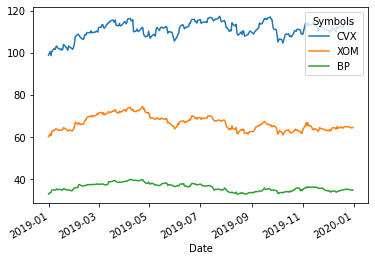

In [73]:
prices.plot()

In [74]:
# 各列間の相関係数の算出。
rets.corr()

Symbols,CVX,XOM,BP
Symbols,,,
CVX,1.000000,0.754501,0.573620
XOM,0.754501,1.000000,0.667784
BP,0.573620,0.667784,1.000000


In [76]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

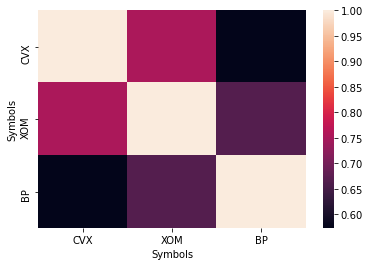

In [77]:
# 相関性を描画
sns.heatmap(rets.corr())


In [78]:
ser1 = Series(['w','w','w','w','w','y','w','w','x','w','x','w'])

In [80]:
# 重複したものを数える。
ser1.value_counts()

w    9
x    2
y    1
dtype: int64

In [82]:
# ユニークなものを数える
ser1.unique()

array(['w', 'y', 'x'], dtype=object)

In [83]:
# 欠損値の取扱

from numpy import nan

In [85]:
data = Series(['one','two',nan, 'three'])
data

0      one
1      two
2      NaN
3    three
dtype: object

In [86]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [88]:
# 欠損地を取り除く：Series
data.dropna()


0      one
1      two
3    three
dtype: object

In [89]:
df = DataFrame([[1,2,3],[nan,5,6,],[7,nan,9],[nan,nan,nan]])
df

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [90]:
df.dropna()

,0,1,2
0,1.0,2.0,3.0


In [91]:
# 全て欠損値の行だけ消す
df.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [92]:
# 列方向でnanがあるものを消す。
df.dropna(axis = 1)

""
0
1
2
3


In [94]:
df2 = DataFrame([[1,2,3,nan],[2,nan,5,6,],[7,nan,8,9],[1,nan,nan,nan]])
df2

,0,1,2,3
0,1,2.0,3.0,NaN
1,2,NaN,5.0,6.0
2,7,NaN,8.0,9.0
3,1,NaN,NaN,NaN


In [95]:
# 指定した条件でnanを消す

df2.dropna(thresh=2)
# 2個以上nanのある行

,0,1,2,3
0,1,2.0,3.0,NaN
1,2,NaN,5.0,6.0
2,7,NaN,8.0,9.0


In [96]:
# 欠損値を置換
df2.fillna(1)

,0,1,2,3
0,1,2.0,3.0,1.0
1,2,1.0,5.0,6.0
2,7,1.0,8.0,9.0
3,1,1.0,1.0,1.0


In [97]:
# 欠損値を指定した条件で埋める。

df2.fillna({0:100, 1:200, 2:300, 3:500})
# keyが列の上に対応している

,0,1,2,3
0,1,2.0,3.0,500.0
1,2,200.0,5.0,6.0
2,7,200.0,8.0,9.0
3,1,200.0,300.0,500.0


In [98]:
# indexの階層構造

from numpy.random import randn

In [99]:
# 階層構造のインデックス

ser = Series(np.random.randn(6), index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])
ser

1  a    0.551197
   b    0.384732
   c    0.856970
2  a   -0.764279
   b   -0.277139
   c   -0.276354
dtype: float64

In [100]:
ser[1]

a    0.551197
b    0.384732
c    0.856970
dtype: float64

In [101]:
ser[2]

a   -0.764279
b   -0.277139
c   -0.276354
dtype: float64

In [102]:
ser[:,'a']

1    0.551197
2   -0.764279
dtype: float64

In [104]:
df = ser.unstack()
df

,a,b,c
1,0.551197,0.384732,0.856970
2,-0.764279,-0.277139,-0.276354


In [105]:
df.unstack

<bound method DataFrame.unstack of           a         b         c
1  0.551197  0.384732  0.856970
2 -0.764279 -0.277139 -0.276354>